## Matrisedynamikk (MIP 10.9)

In [ ]:
try:
    import python_linear_algebra
except:
    !pip install python_linear_algebra@git+https://github.com/mbr085/python_linear_algebra
    import python_linear_algebra


In [ ]:
import numpy as np
from python_linear_algebra.matrix_reduction import skriv_ut_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import skriv_ut_numpy_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import finn_egenvektorer_og_egenverdier
from python_linear_algebra.matrix_reduction import gauss_jordan

## Laserindusert fluorescens (LIF)

Vi fortsetter vår undersøkelse av laserindusert fluorescens der vi fant overgangsmatrisen
$$
B = \begin{bmatrix}
  1-p & q \\
  p & 1 - q
\end{bmatrix}
$$
med $p=0.02$ og $q = 0.05$.

for de diskrete tidsstegene i Eulers metode.

### **Diskret tids populasjonsdynamikk med en overgangsmatrise**  
Tenker vi på tidspunktene som diskrete verdier $t_0 = 0, t_1 = 1, \dots$
uttrykkte vi populasjonsutviklingen som:  

$$
\vec v(t+1) = B \cdot \vec v(t)
$$

hvor:

- $ \vec v(t) = \begin{bmatrix} v_g(t) \\ v_e(t) \end{bmatrix} $ representerer populasjonene i henholdsvis grunntilstand og eksitert tilstand ved tidspunkt $ t $.
- $ B $ er **overgangsmatrisen**, som bestemmer hvordan populasjonene endrer seg mellom tidssteg.

(Vi skrev $x_n$ i stedet for $v_g(t)$ og $y_n$ i stedet for $v_e(t)$ når $t = n$)

---

En **likevektstilstand**, er en tilstand $\vec w = \begin{bmatrix}w_g \\ w_e\end{bmatrix}$ slik at

$$
B \cdot \vec w = \vec w.
$$

For å finne likevektstilstandene løser vi:
$$
\begin{bmatrix}
1 - p & q \\
p & 1 - q
\end{bmatrix}
\begin{bmatrix} w_g \\ w_e \end{bmatrix}
=
\begin{bmatrix} w_g \\ w_e \end{bmatrix}.
$$

Det vil si at vi søker en **egenvektor** $\vec w$ til $A$ med egenverdi $1$. Derfor rekkereuserer vi

$$B - 1\cdot I =
\begin{bmatrix}
1 - p & q \\
p & 1 - q
\end{bmatrix} -
\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
=
\begin{bmatrix} -p & q \\ p & -q \end{bmatrix}
\sim
\begin{bmatrix} p & -q \\ 0 & 0 \end{bmatrix}
.
$$

Her er andre parameter $w_e$ fri, og $pw_g - qw_e = 0$ slik at
$$\frac{w_g}{w_e} = \frac{q}{p}$$

La oss sette inn tall igjen

In [ ]:
p = 0.02 # (2 % av molekylene går til eksitert tilstand per steg).
q = 0.05 # (5 % av molekylene slapper av tilbake per steg).

B = np.array([
    [1 - p, q],
    [p, 1 - q]
])

In [ ]:
B

array([[0.98, 0.05],
       [0.02, 0.95]])

In [ ]:
skriv_ut_egenvektorer_og_multiplikasjon_med_matrise(B, finn_egenvektorer_og_egenverdier(B))

Alle vektorer her skal leses som kolonnevektorer

egenverdi:      0.93
egenvektor:     [-1.  1.]
A @ evenvektor: [-0.93  0.93]

egenverdi:      1.0
egenvektor:     [2.5 1. ]
A @ evenvektor: [2.5 1. ]



Egenwektoren $\vec w = \begin{bmatrix}w_g \\ w_e\end{bmatrix} =  \begin{bmatrix}2.5 \\ 1\end{bmatrix}$ til egenverdien $1$ for $A$ har som forutsakt
$$\frac{w_g}{w_e} = \frac{2.5}{1} = \frac{0.05}{0.02} = \frac{q}{p}.$$

Hvis $\vec v(0) = \vec w$, da er
$\vec v(1) = B \cdot \vec v(0) = B \cdot \vec w = 1 \cdot \vec w = \vec w = \vec v(0)$. Derfor er også
$$\vec v(2) = B \cdot \vec v(1) = B \cdot \vec v(0) = \vec v(0).$$
Fortsetter vi slik ser vi at $\vec v(t) = \vec v(0)$ for $t = 0, 1, 2, \dots$

---

La $\vec u = \begin{bmatrix}-1 \\ 1\end{bmatrix}$ være egenvektoren til egenverdien $0.93$ for $B$ som vi fant ovenfor.

Hvis $\vec v(0) = \vec u$, da er
$\vec v(1) = B \cdot \vec v(0) = B \cdot \vec u = 0.93 \cdot \vec u = 0.93 \cdot \vec v(0)$. Videre er
$$\vec v(2) = B \cdot \vec v(1) = B \cdot (0.93 \cdot \vec v(0)) = 0.93 \cdot (B \cdot \vec v(0)) = 0.93 \cdot (0.93 \cdot \vec v(0)) = (0.93)^2 \cdot \vec v(0).$$
Fortsetter vi slik ser vi at $\vec v(t) = (0.93)^t \cdot \vec v(0)$ for $t = 0, 1, 2, \dots$

---

I allmindelighet vet vi at $\vec v(t) = B^t \cdot \vec v(0)$ for $t = 0, 1, 2, \dots$ uansett hva $\vec v(0)$ er. (Hvorfor vet vi det?)

#### Eksempel

La oss si at $v(0) = \begin{bmatrix}1\\0\end{bmatrix}$. Da får vi

In [ ]:
v_0 = np.array([
    [1],
    [0]
])

In [ ]:
v_1 = B @ v_0
v_1

array([[0.98],
       [0.02]])

In [ ]:
v_2 = B @ v_1
v_2

array([[0.9614],
       [0.0386]])

In [ ]:
v_3 = B @ v_2
v_3

array([[0.944102],
       [0.055898]])

In [ ]:
v_4 = B @ v_3
v_4

array([[0.92801486],
       [0.07198514]])

In [ ]:
v_5 = B @ v_4
v_5

array([[0.91305382],
       [0.08694618]])

La oss igjen lage en liste av tillstander og plotte med antall tidssteg lang x-aksen

In [ ]:
def populasjons_utvikling(overgangsmatrise, start_tilstand, antall_steg):
    v = [start_tilstand]
    for _ in range(antall_steg):
        v.append(overgangsmatrise @ v[-1])
    return np.hstack(v)

In [ ]:
v = populasjons_utvikling(B, v_0, 100)

In [ ]:
import matplotlib.pyplot as plt

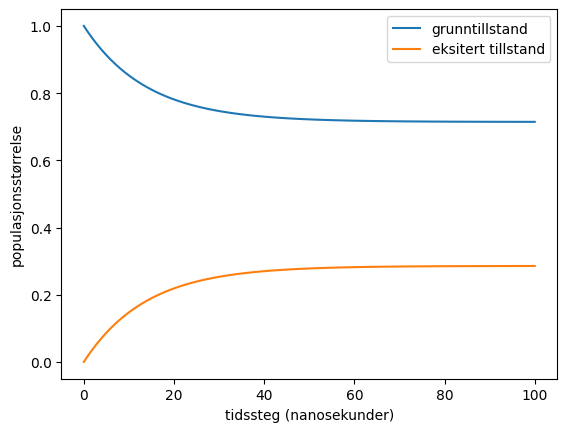

In [ ]:
plt.plot(v[0], label='grunntillstand')
plt.plot(v[1], label='eksitert tillstand')
plt.xlabel('tidssteg (nanosekunder)')
plt.ylabel('populasjonsstørrelse')
plt.legend()

### **Iterasjon av populasjonsdynamikken**  

Med en startpopulasjon $ \vec v(0) $ har vi sett at vi kan beregne fremtidige populasjoner som:

$$
\vec v(t) = B^t \cdot \vec v(0)
$$

La oss sjekke at $\vec v(5) = B^5 \cdot \vec v(0)$:

In [ ]:
v_5, np.linalg.matrix_power(B, 5) @ v_0

(array([[0.91305382],
        [0.08694618]]),
 array([[0.91305382],
        [0.08694618]]))

La oss se på $\vec v(90)$ og $\vec v(100)$:

In [ ]:
np.linalg.matrix_power(B, 90) @ v_0

array([[0.71470201],
       [0.28529799]])

In [ ]:
np.linalg.matrix_power(B, 100) @ v_0

array([[0.71448719],
       [0.28551281]])

De er veldig like. La oss se om det går an å forklare det.

La oss tenke oss at vi kan skrive $\vec v(0)$ på formen $\vec v(0) = x \vec u + y \vec w$. Da blir
$$\vec v(1) = B \cdot \vec v(0) = B \cdot(x \vec u + y \vec w) = B \cdot (x \vec u) + B \cdot(y \vec w) = x B \cdot \vec u + y B \cdot \vec w = 0.93 \cdot x \cdot \vec u + y \cdot \vec w.$$

For $t = 0,1,2, \dots$ blir
$$\vec v(t) = B^t \cdot \vec v(0) = B^t \cdot(x \vec u + y \vec w) = B^t \cdot (x \vec u) + B^t \cdot(y \vec w) = x B^t \cdot \vec u + y B^t \cdot \vec w = (0.93)^t \cdot x \cdot \vec u + y \cdot \vec w.$$

Når $t$ blir stor blir tallet $(0.93)^t$ veldig liten, så $\vec v(t)$ blir nesten lik $y \cdot \vec w$.

---

## Spørsmål:

For $\vec v(0) = \begin{bmatrix}1\\0\end{bmatrix}$, er det da mulig å finne $x$ og $y$ slik at $\vec v(0) = x \vec u + y \vec w$?

## Svar:

Uttrykket $\vec v(0) = x \vec u + y \vec w$ kan skrives som ligningssystemet
$$
\begin{array}{rcrcr}
-x &+& 2.5\cdot y &=& 1\\
x &+& y &=& 0
\end{array}
$$

Dette kan vi løse med Gauss Jordan eliminasjon

In [ ]:
M = np.array([
    [-1, 2.5, 1],
    [1, 1, 0]
])

In [ ]:
gauss_jordan(M)

array([[ 1.        ,  0.        , -0.28571429],
       [ 0.        ,  1.        ,  0.28571429]])

La oss lese ut $x$ og $y$ gitt i siste kolonne:

In [ ]:
x, y = gauss_jordan(M)[:, -1]

In [ ]:
x, y

(np.float64(-0.28571428571428575), np.float64(0.28571428571428575))

La oss dobbelsjekke at $\vec v(0) = x \vec u + y \vec w$

In [ ]:
u = np.array([[-1],[1]])
w = np.array([[2.5], [1]])
v_0, x*u + y*w

(array([[1],
        [0]]),
 array([[1.],
        [0.]]))

In [ ]:
np.allclose(v_0, x*u + y*w)

True

La oss sjekke at $\vec v(4) = (0.93)^4 \cdot x \cdot \vec u + y \cdot \vec w$

In [ ]:
v_4, (0.93)**4*x*u + y*w

(array([[0.92801486],
        [0.07198514]]),
 array([[0.92801486],
        [0.07198514]]))

In [ ]:
np.allclose(v_4, (0.93)**4*x*u + y*w)

True

In [ ]:
t = 90

In [ ]:
np.allclose(np.linalg.matrix_power(B, t) @ v_0, (0.93)**t *x*u + y*w)

True

In [ ]:
t = 100

In [ ]:
np.allclose(np.linalg.matrix_power(B, t) @ v_0, (0.93)**t *x*u + y*w)

True

## Oppgave

La oss si at $B$ er en matrise på formen
$$B = \begin{bmatrix}1-p&q\\p&1-q\end{bmatrix}$$ der $p$ og $q$ er tall mellom $0$ og $1$ slik at $p + q > 0$.
1. Beregn determinanten $$\det(B-tI) = \begin{vmatrix}1-p-t&q\\p&1-q-t\end{vmatrix}$$ som et polynom i $t$.
2. Sjekk at egenverdiene $t_1$ og $t_2$ til $B$ er $1$ og $1-p-q$.
3. Finn egenvektorene til $B$. Gi egenvektoren til egenverdien $t_1 = 1$ navnet $\vec w$ og gi den andre egenvektoren navnet $\vec u$.
4. Gitt en vektor $\vec v(0) = \begin{bmatrix}v_g(0) \\v_e(0)\end{bmatrix}$, finn formler for tallene $x$ og $y$ slik at $x\cdot \vec w + y \cdot \vec u = \vec v(0)$.
5. La $\vec v(1) = B \cdot \vec v(0)$ og $\vec v(2) = B\cdot \vec v(1)$ og så videre. Forklar hvorfor $\vec v(t)$ nærmer seg $\vec w$ når $t$ blir stor.
